# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:brown"> Esercizio 12 </span>


### Esercizio 12.1


In questa esercitazione utilizzeremo dei modelli di deep neural network implementati nel pacchetto Keras di python, allo scopo di riconoscere le cifre fra 0 e 9 scritte a mano.

Il dataset MNIST compara $70000$ cifre scritte a mano, ognuna delle quali è contenuta in un quadrato diviso in un griglia di $28\times 28$ pixel. Ogni pixel può assumere $256$ gradazioni di grigio diverse, quindi ogni punto può assumere un valore $\{0,1,\dots,255\}$. Si tratta di un **problema di classificazione** visto che abbiamo $10$ categorie corrispondenti alle 10 cifre. 

In [118]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

#### Step 1

Innanzitutto scarichiamo i dati MNIST dal web, verrà così crearo il training data set e il test data set.

In [164]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


#### Step 2
Diamo la giusta struttura ai dati per poterli utilizzare

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


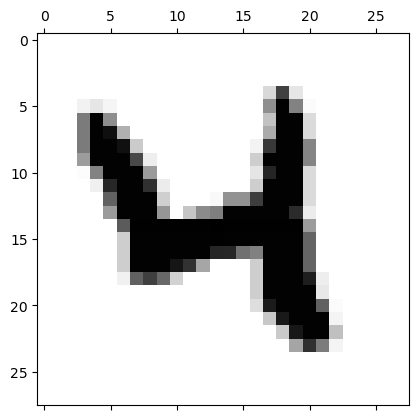

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [165]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)   #creo un vettore 1D di dimensione colonne*righe
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')   #converto nel tipo che serve alla rete neurale
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255             #normalizzo, aiuta a far  convergere ppiù velocemnte algoritmo
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape) #6000 è il numero di esempi
print('Y_train shape:', Y_train.shape)

#### Step 3
Costruiamo ora la nostra rete neurale profonda


In [166]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))            #con il dropout spengo alcuni neuroni a caso per evitare l'overfitting
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 4
Scegliamo l'ottimizzatore e la funzione di costo 

In [167]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 5
Facciamo il training del modello

In [168]:
# training parameters
batch_size = 32
epochs = 40

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7978 - acc: 0.7649 - val_loss: 0.3155 - val_acc: 0.9154
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3887 - acc: 0.8892 - val_loss: 0.2396 - val_acc: 0.9302
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3158 - acc: 0.9107 - val_loss: 0.2033 - val_acc: 0.9398
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2728 - acc: 0.9224 - val_loss: 0.1773 - val_acc: 0.9475
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2405 - acc: 0.9314 - val_loss: 0.1617 - val_acc: 0.9517
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2177 - acc: 0.9378 - val_loss: 0.1469 - val_acc: 0.9543
Epoch 7/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1978 - acc: 0.9446 - val_loss: 0.1347 - val_acc: 0.9588
Epoch 8/40
1875/1875 [==============================] - 

#### Step 6
Valutiamo la performance del nostro modello su dei dati sconosciuti

313/313 [==============================] - 1s 3ms/step - loss: 0.0600 - acc: 0.9810

Test loss: 0.06000164896249771
Test accuracy: 0.9810000061988831


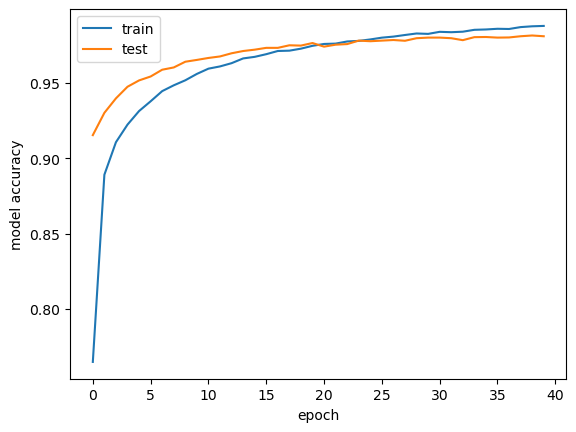

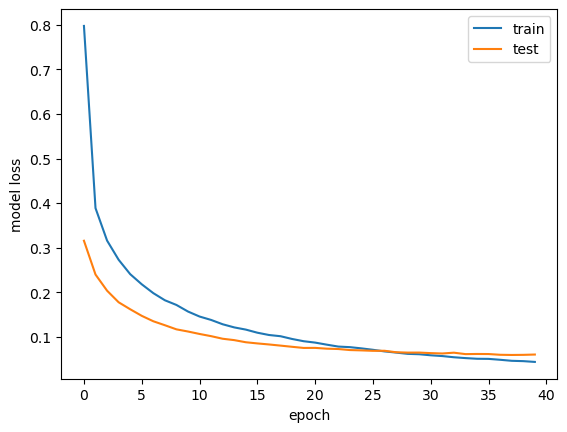

In [169]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 4ms/step


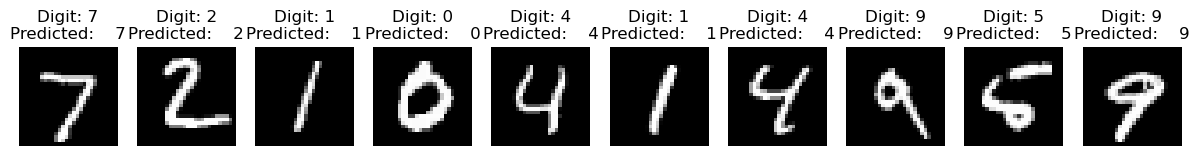

In [170]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Di seguito riportiamo le performance della rete per varie scelte di $N_{epochs}$
1. con 5 epochs

Test loss: 0.1571812778711319

Test accuracy: 0.9526000022888184

2. con 10 epochs: 

Test loss: 0.10793177783489227

Test accuracy: 0.9675999879837036

3. con 20 epochs:

Test loss: 0.08797714859247208

Test accuracy: 0.9736999869346619


4. con 40 epochs:

Test loss: 0.06000164896249771

Test accuracy: 0.9810000061988831

Con 40 epoche si arriva a un plateau della performance, e si riesce a identificare anche la cifra 5, la quale con un numero inferiore di epoche non viene identificata correttamente.

Ora proviamo ad utilizzare degli ottimizzatori differenti 

Model compiled successfully and ready to be trained.
Epoch 1/40
1875/1875 [==============================] - 19s 9ms/step - loss: 2.2657 - acc: 0.1427 - val_loss: 2.1395 - val_acc: 0.2837
Epoch 2/40
1875/1875 [==============================] - 15s 8ms/step - loss: 2.0973 - acc: 0.2729 - val_loss: 1.9709 - val_acc: 0.5286
Epoch 3/40
1875/1875 [==============================] - 15s 8ms/step - loss: 1.9410 - acc: 0.3978 - val_loss: 1.8014 - val_acc: 0.6628
Epoch 4/40
1875/1875 [==============================] - 15s 8ms/step - loss: 1.7906 - acc: 0.4925 - val_loss: 1.6341 - val_acc: 0.7296
Epoch 5/40
1875/1875 [==============================] - 16s 9ms/step - loss: 1.6474 - acc: 0.5506 - val_loss: 1.4728 - val_acc: 0.7672
Epoch 6/40
1875/1875 [==============================] - 16s 9ms/step - loss: 1.5098 - acc: 0.5962 - val_loss: 1.3236 - val_acc: 0.7900
Epoch 7/40
1875/1875 [==============================] - 16s 8ms/step - loss: 1.3891 - acc: 0.6305 - val_loss: 1.1929 - val_acc: 0.8041
Ep

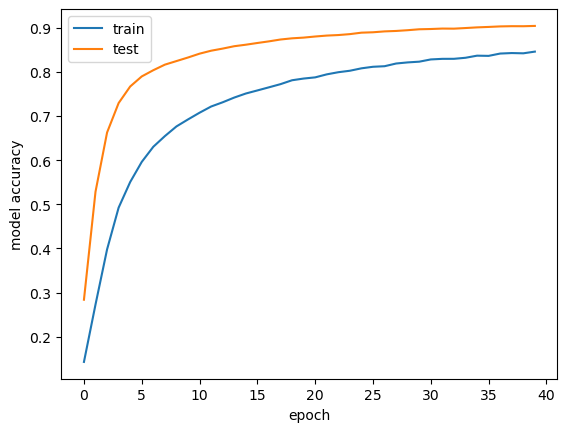

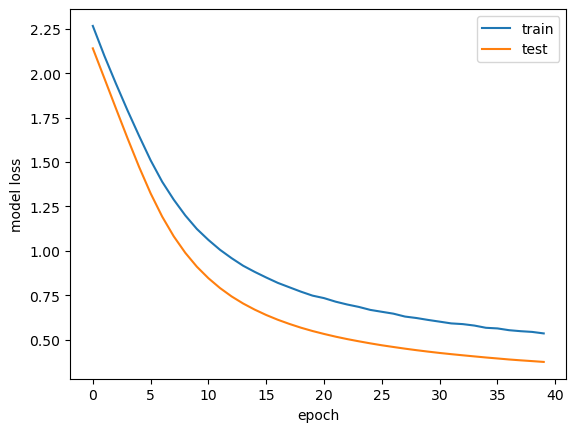

313/313 [==============================] - 1s 4ms/step


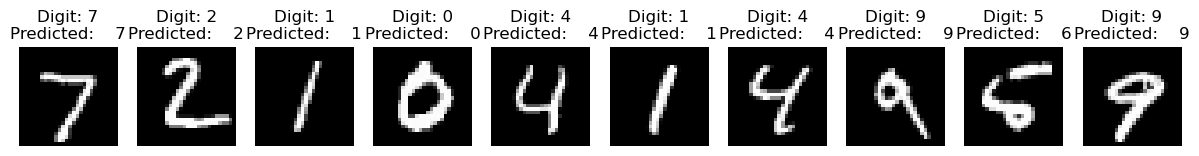

In [158]:


def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adadelta',
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 32
epochs = 40

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Model compiled successfully and ready to be trained.
Epoch 1/40
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2848 - acc: 0.9165 - val_loss: 0.1299 - val_acc: 0.9646
Epoch 2/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1467 - acc: 0.9619 - val_loss: 0.1348 - val_acc: 0.9663
Epoch 3/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1299 - acc: 0.9685 - val_loss: 0.1127 - val_acc: 0.9732
Epoch 4/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1253 - acc: 0.9707 - val_loss: 0.1063 - val_acc: 0.9774
Epoch 5/40
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1187 - acc: 0.9735 - val_loss: 0.1297 - val_acc: 0.9756
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1176 - acc: 0.9750 - val_loss: 0.1447 - val_acc: 0.9758
Epoch 7/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1178 - acc: 0.9754 - val_loss: 0.1468 - val_acc: 0.9768
Ep

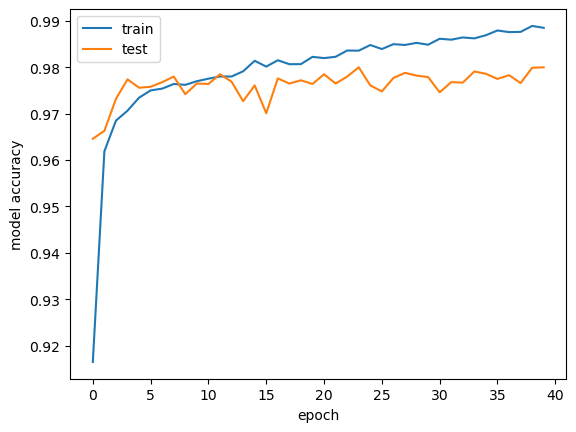

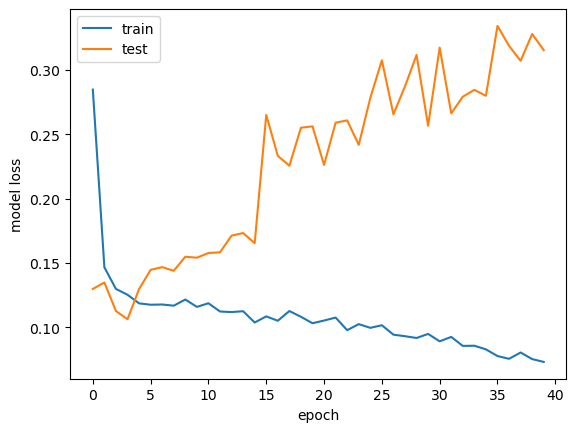

313/313 [==============================] - 1s 4ms/step


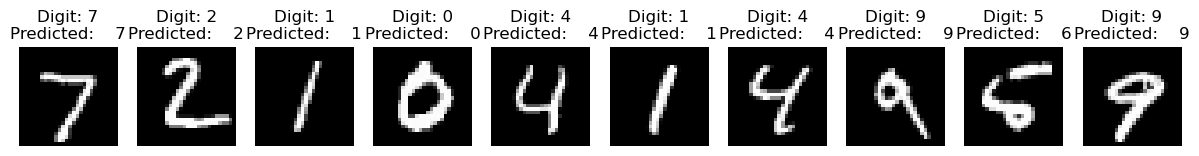

In [155]:


def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 32
epochs =40

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Utilizzando gli ottimizzatori **RMSprop** e **adadelta**  la performance è peggiore infatti la cifra 5 non viene riconosciuta, osserviamo anche che usando **RMSprop** la funzione di costo aumenta con l'aumentare delle epoche durante il test.

### Esercizio 12.2

#### Convolutional Neural Nets

Con questo tipo di rete sfrutteremo le correlazioni locali fra i pixel e l'invarianza traslazionale, in modo da rendere migliore la performance della nostra classificazione.
Per operare con questo tipo di rete occorre innanzitutto mettere i dati nella forma vettore monodimensionale di lunghezza $(28\times 28, 1)$.

In [137]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)   #numero di dati, numero di canali (1 per i grigi), altezza, larghezza
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples




Cambiamo ora la struttura della nostra DNN in modo da renderla una CNN : Convolutional Neural Nets.


In [140]:


def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    #
    model.add(Conv2D(10,kernel_size=(5, 5),
                     activation='relu',))
    # add a dense all-to-all relu layer
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())

    model.add(Dense(400, activation='relu'))
    
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model



Training

In [141]:
# training parameters
batch_size = 32
epochs =  20 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))



Epoch 1/20
1875/1875 [==============================] - 24s 12ms/step - loss: 0.7588 - acc: 0.7539 - val_loss: 0.1655 - val_acc: 0.9497
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2217 - acc: 0.9335 - val_loss: 0.1079 - val_acc: 0.9668
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1607 - acc: 0.9539 - val_loss: 0.0805 - val_acc: 0.9737
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1323 - acc: 0.9607 - val_loss: 0.0703 - val_acc: 0.9771
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1156 - acc: 0.9667 - val_loss: 0.0620 - val_acc: 0.9801
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1020 - acc: 0.9701 - val_loss: 0.0557 - val_acc: 0.9818
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0908 - acc: 0.9733 - val_loss: 0.0511 - val_acc: 0.9839
Epoch 8/20
1875/1875 [==========================

313/313 [==============================] - 2s 7ms/step - loss: 0.0372 - acc: 0.9880

Test loss: 0.037176959216594696
Test accuracy: 0.9879999756813049


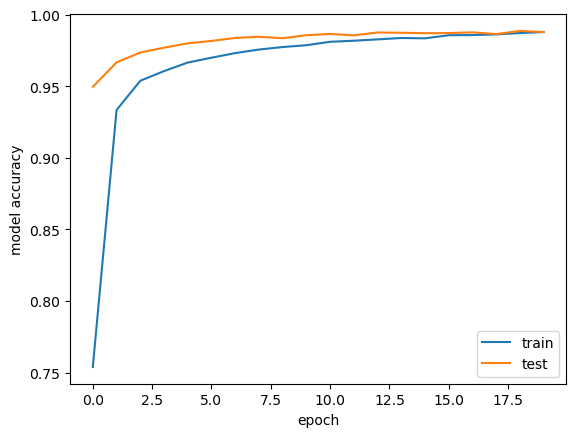

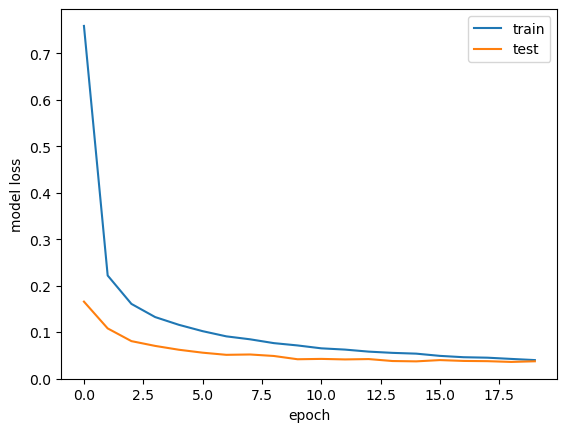

In [142]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 4ms/step


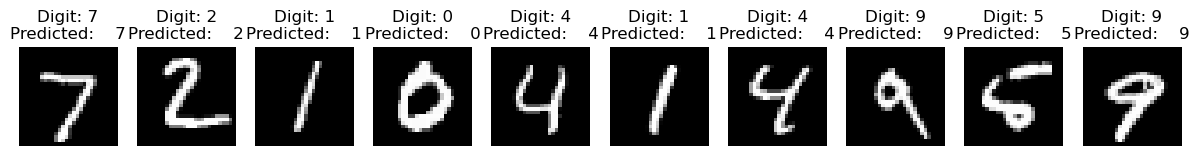

In [148]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Esercizio 12.3


Creiamo ora delle immagini tramite l'applicazione `gimp` e osserviamo come la nostra CNN agisce su di esse.


Image size: 28x28
1/1 [==============================] - 0s 43ms/step


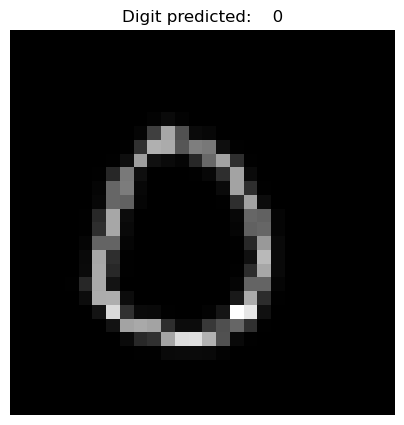

Image size: 28x28
1/1 [==============================] - 0s 32ms/step


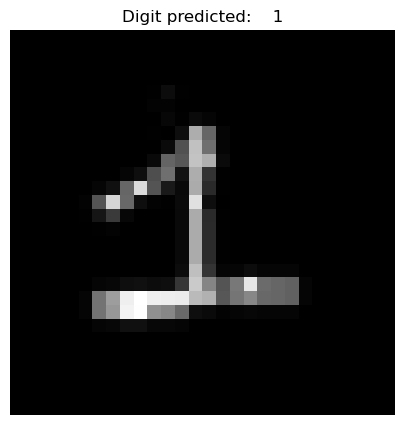

Image size: 28x28
1/1 [==============================] - 0s 31ms/step


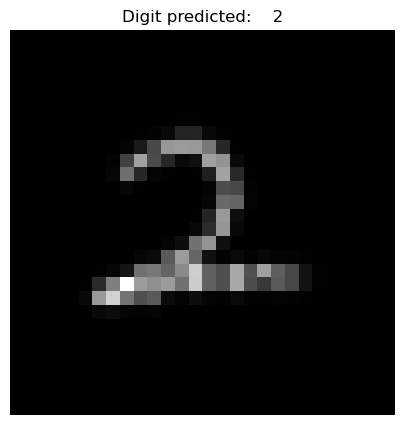

Image size: 28x28
1/1 [==============================] - 0s 33ms/step


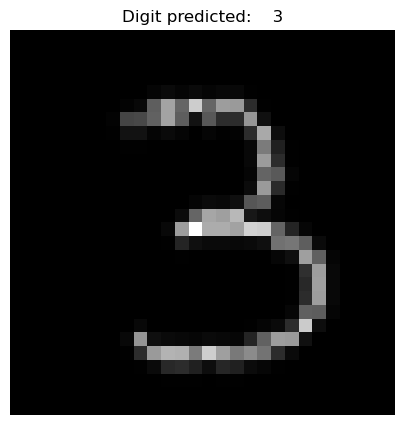

Image size: 28x28
1/1 [==============================] - 0s 35ms/step


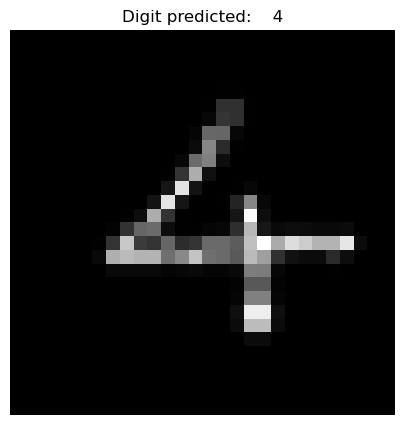

Image size: 28x28
1/1 [==============================] - 0s 32ms/step


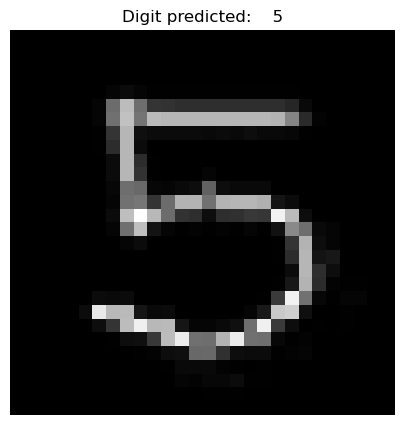

Image size: 28x28
1/1 [==============================] - 0s 38ms/step


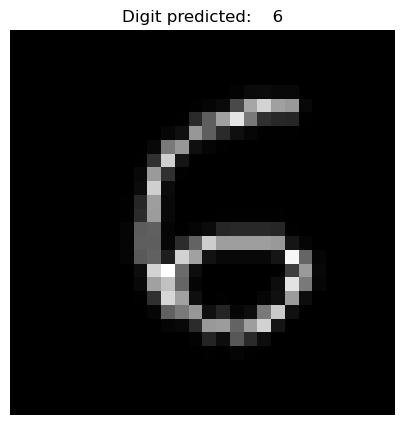

Image size: 28x28
1/1 [==============================] - 0s 29ms/step


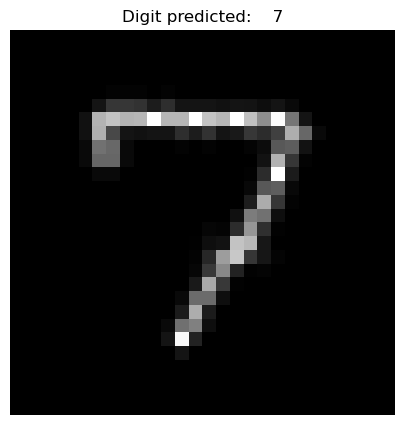

Image size: 28x28
1/1 [==============================] - 0s 39ms/step


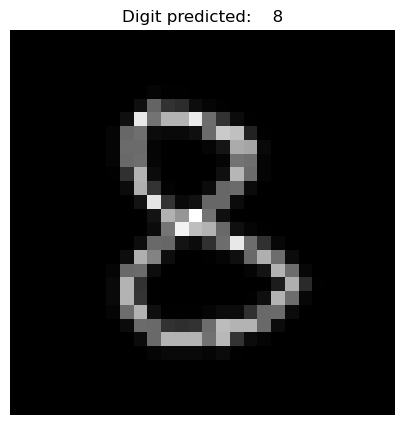

Image size: 28x28
1/1 [==============================] - 0s 32ms/step


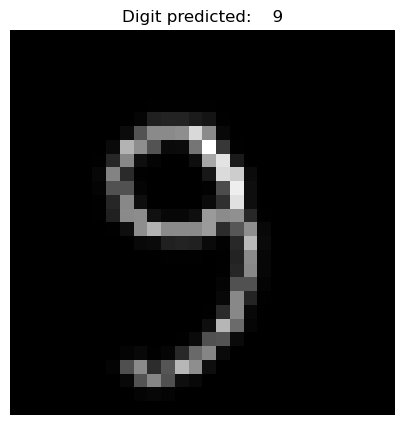

In [145]:
from PIL import Image
import os

for i in range (10):
    digit_filename = "./Pictures/"+str(i)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255


    data = data.reshape(1,xdim*ydim)
    if keras.backend.image_data_format() == 'channels_first':
      data = data.reshape(data.shape[0], 1, img_rows, img_cols)
      input_shape = (1, img_rows, img_cols)
    else:
      data = data.reshape(data.shape[0], img_rows, img_cols, 1)
      input_shape = (img_rows, img_cols, 1)

    pred_0 = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)
    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()
 

Osserviamo infine cosa succede se non sfruttiamo le proprietà locali e l'invarianza traslazionale

Image size: 28x28
1/1 [==============================] - 0s 154ms/step


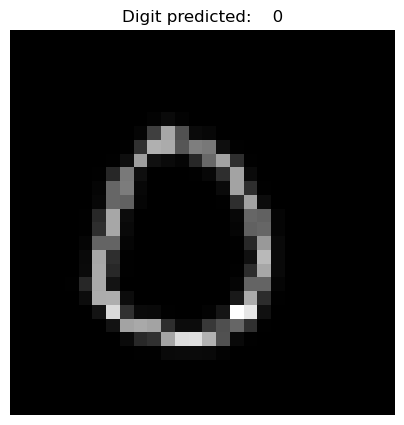

Image size: 28x28
1/1 [==============================] - 0s 40ms/step


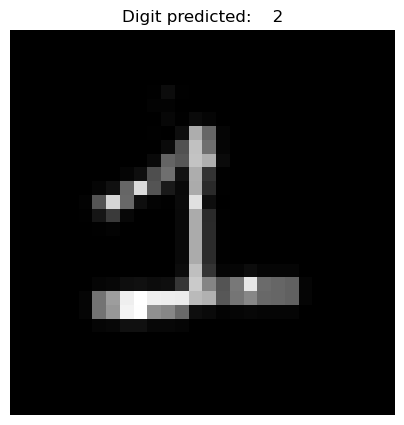

Image size: 28x28
1/1 [==============================] - 0s 34ms/step


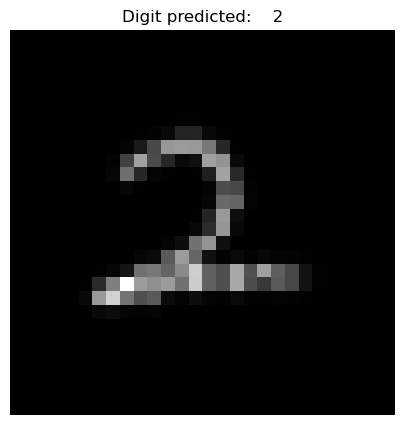

Image size: 28x28
1/1 [==============================] - 0s 45ms/step


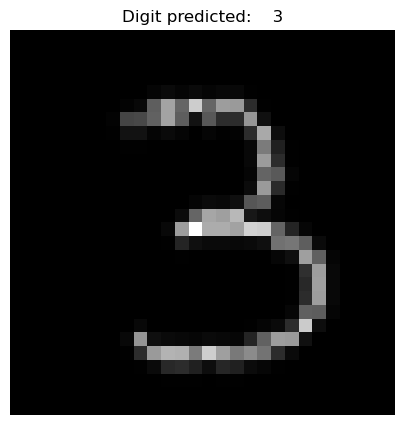

Image size: 28x28
1/1 [==============================] - 0s 38ms/step


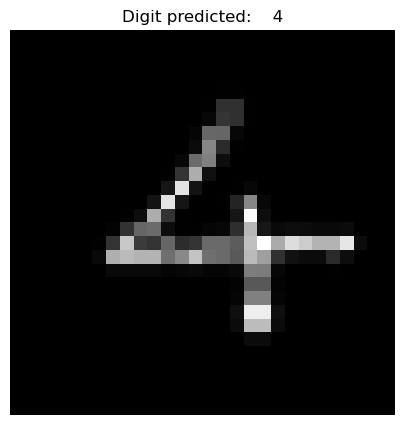

Image size: 28x28
1/1 [==============================] - 0s 38ms/step


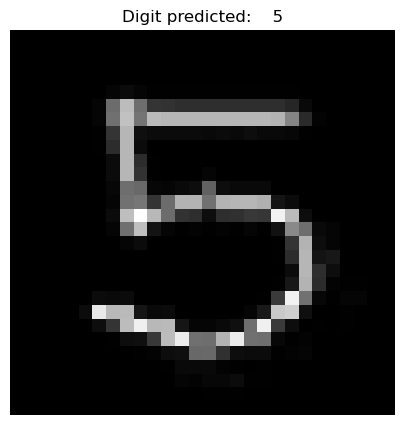

Image size: 28x28
1/1 [==============================] - 0s 35ms/step


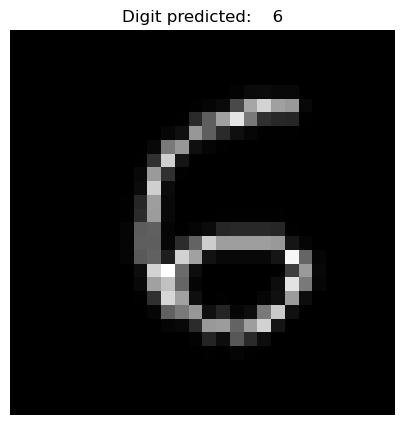

Image size: 28x28
1/1 [==============================] - 0s 33ms/step


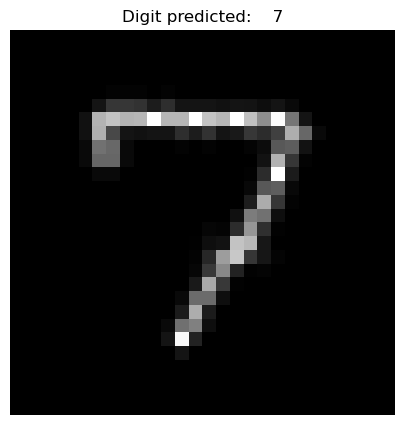

Image size: 28x28
1/1 [==============================] - 0s 35ms/step


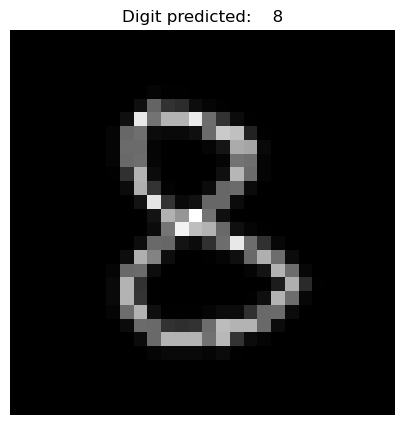

Image size: 28x28
1/1 [==============================] - 0s 33ms/step


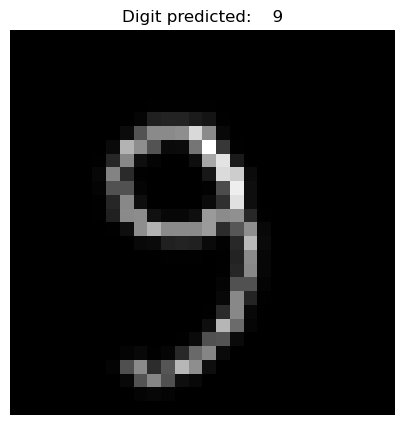

In [146]:
from PIL import Image
import os

for i in range (10):
    digit_filename = "./Pictures/"+str(i)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    data = data.reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()
 

Come ci aspettavamo la performance della DNN è inferiore rispetto a quella della CNN, non ci stupisce che la prima, nel momento in cui deve fare delle predizioni su un data set non proveniente dallo stesso campione del training set, fallisca la predizione di una cifra su dieci. 